In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Datasets/Incidents_service.xlsx')
df.shape

(141712, 25)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.head(5)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,impact,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,problem_id,change request
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,Group 56,Resolver 17,True,False,Do Not Notify,?,?
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,Group 56,Resolver 17,True,False,Do Not Notify,?,?
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,Group 56,Resolver 17,True,False,Do Not Notify,?,?
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:30:00,Phone,Location 165,Category 40,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify,?,?
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:33:00,Phone,Location 165,Category 40,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify,?,?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  141712 non-null  object        
 1   ID_status           141712 non-null  object        
 2   active              141712 non-null  bool          
 3   count_reassign      141712 non-null  int64         
 4   count_opening       141712 non-null  int64         
 5   count_updated       141712 non-null  int64         
 6   ID_caller           141712 non-null  object        
 7   opened_by           141712 non-null  object        
 8   opened_time         141712 non-null  datetime64[ns]
 9   Created_by          141712 non-null  object        
 10  created_at          141712 non-null  datetime64[ns]
 11  updated_by          141712 non-null  object        
 12  updated_at          141712 non-null  datetime64[ns]
 13  type_contact        141712 no

In [ ]:
for i in np.array(df.columns):
    print('Unique values in ' + str(i) + ' attribute are {}'.format(len(df[i].unique()))  )

Unique values in ID attribute are 24918
Unique values in ID_status attribute are 9
Unique values in active attribute are 2
Unique values in count_reassign attribute are 28
Unique values in count_opening attribute are 9
Unique values in count_updated attribute are 115
Unique values in ID_caller attribute are 5244
Unique values in opened_by attribute are 207
Unique values in opened_time attribute are 19849
Unique values in Created_by attribute are 185
Unique values in created_at attribute are 11552
Unique values in updated_by attribute are 846
Unique values in updated_at attribute are 50664
Unique values in type_contact attribute are 5
Unique values in location attribute are 224
Unique values in category_ID attribute are 58
Unique values in user_symptom attribute are 525
Unique values in impact attribute are 3
Unique values in Support_group attribute are 78
Unique values in support_incharge attribute are 234
Unique values in Doc_knowledge attribute are 2
Unique values in confirmation_che

In [ ]:
categorical_features = df[[ 'ID_status', 'active', 'count_reassign', 'count_opening',
                            'count_updated',  'opened_by',  'Created_by', 'updated_by', 
                            'type_contact', 'location','category_ID', 'user_symptom',  
                            'Support_group', 'support_incharge', 'Doc_knowledge', 'impact',
                            'confirmation_check', 'notify','problem_id', 'change request']]

<Figure size 432x288 with 0 Axes>

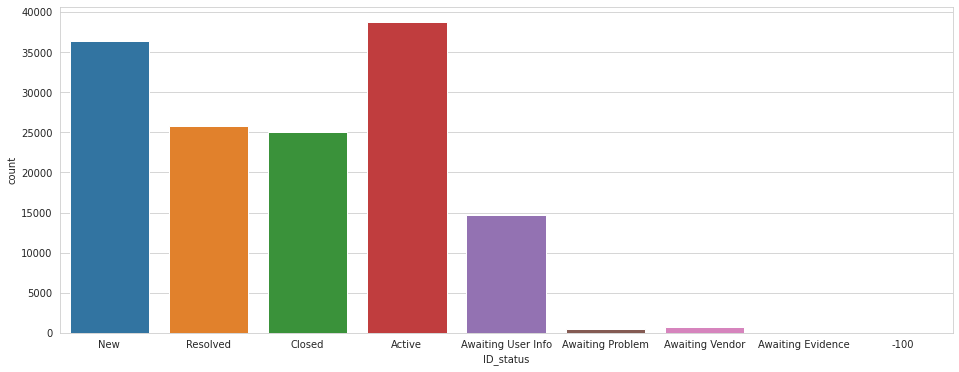

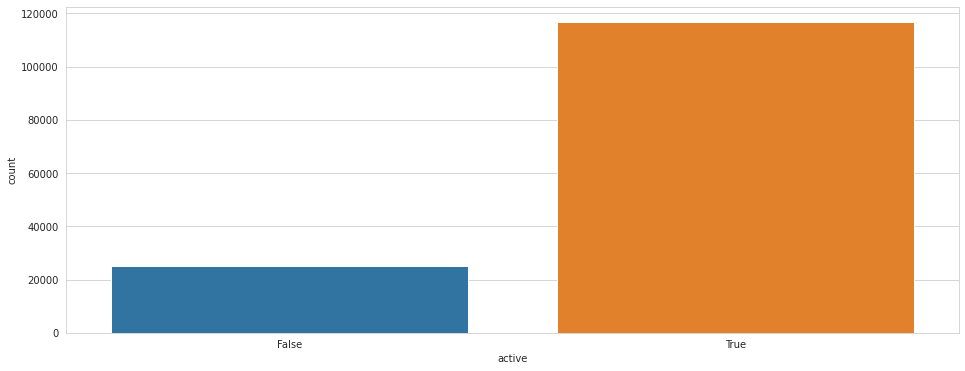

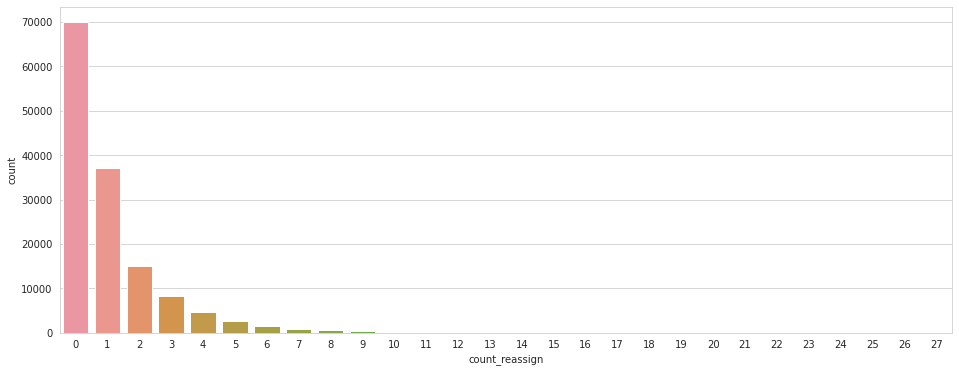

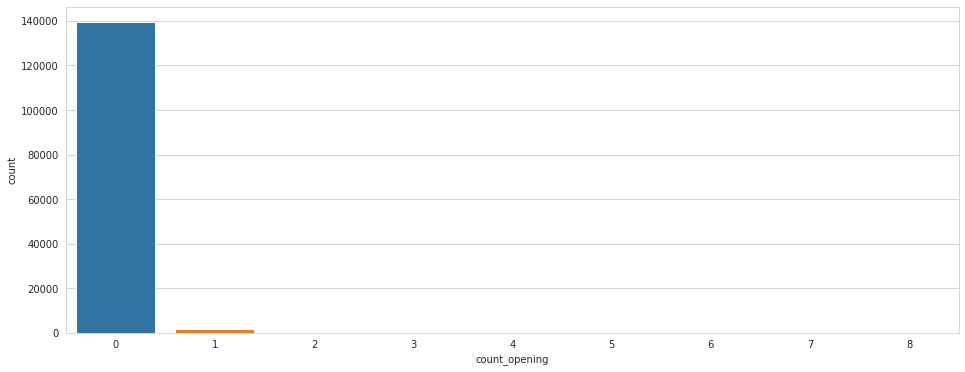

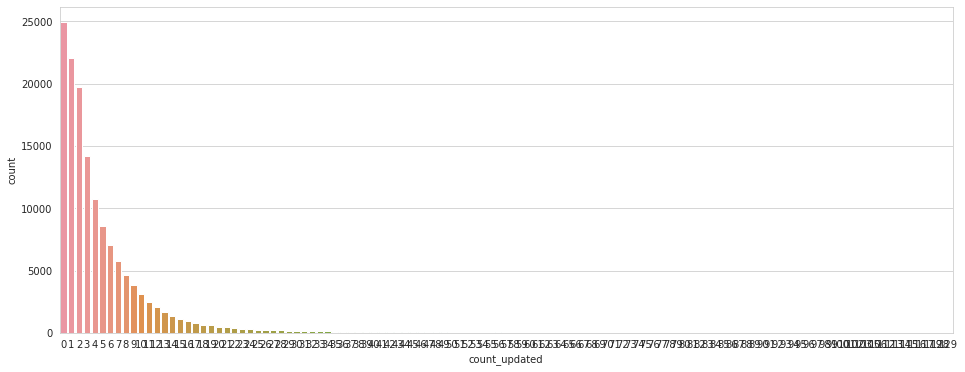

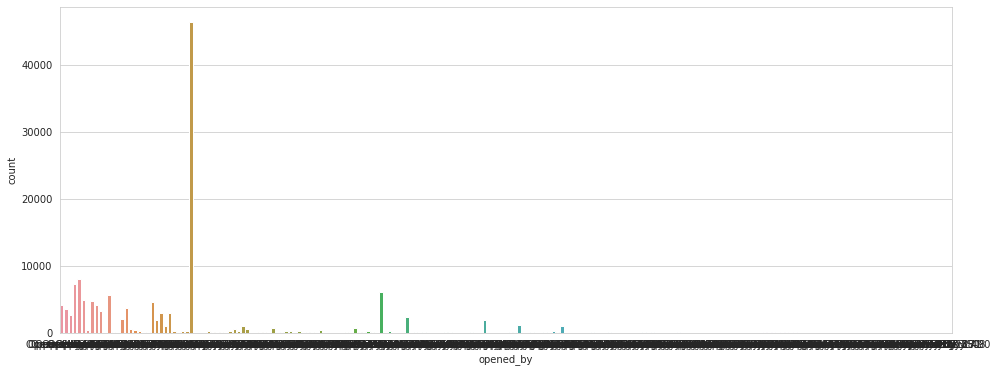

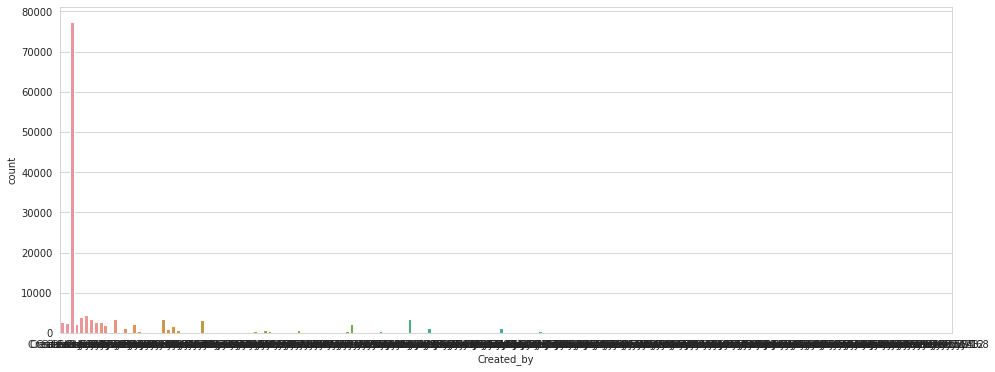

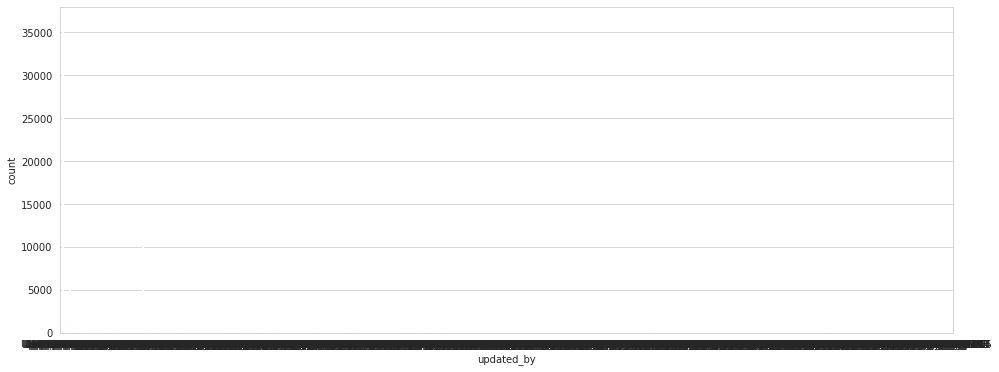

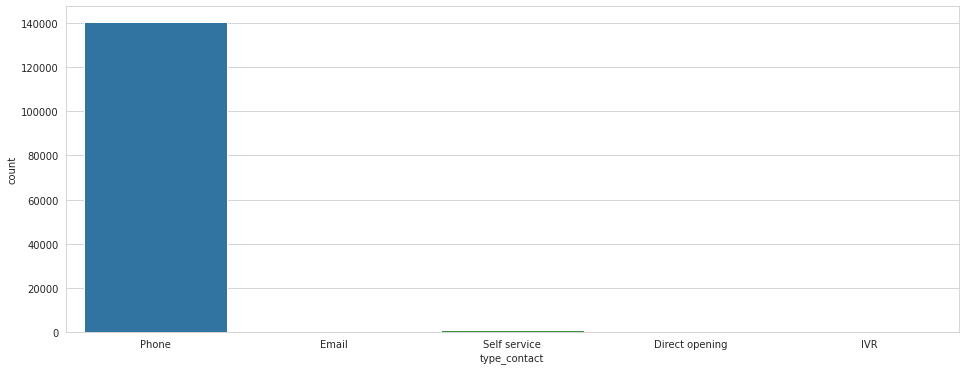

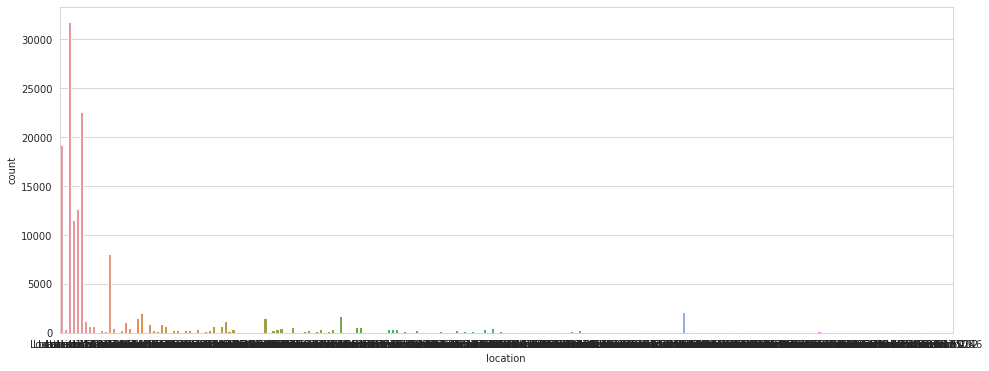

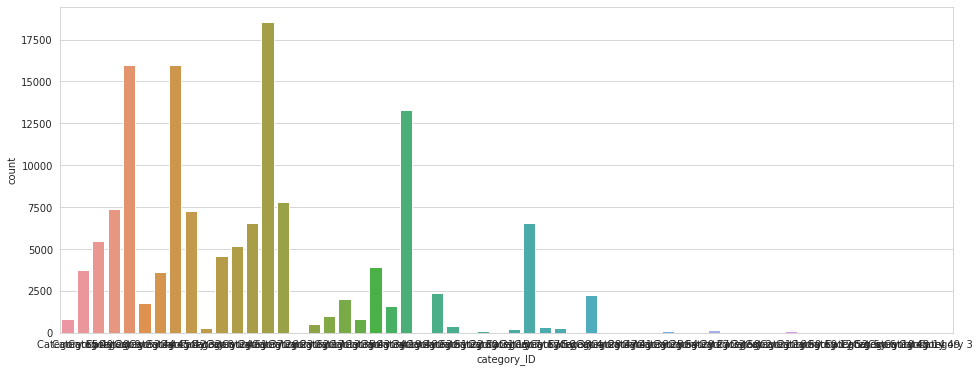

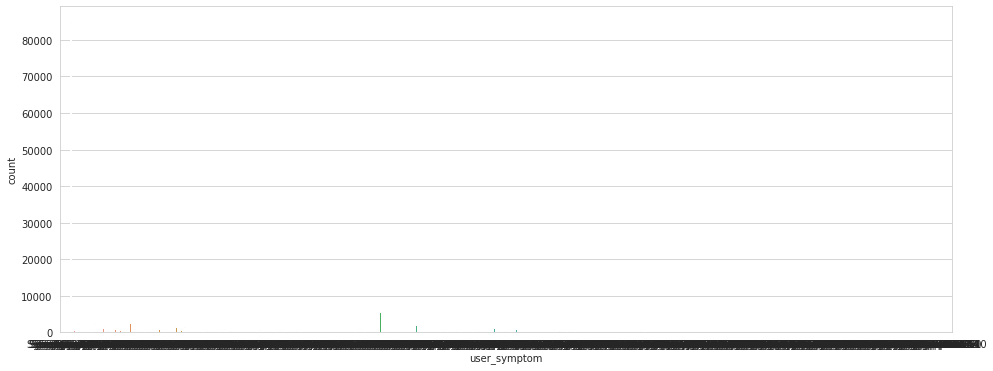

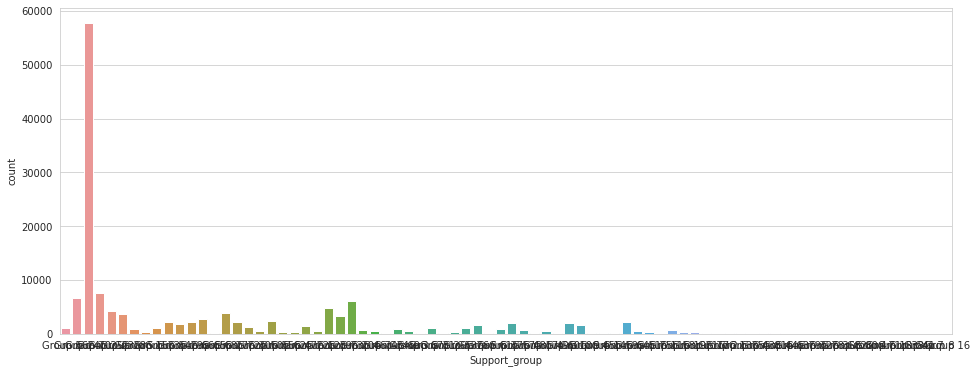

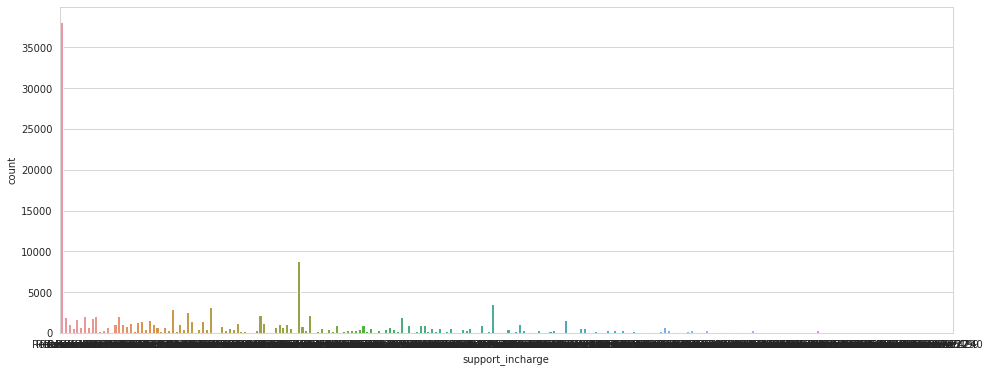

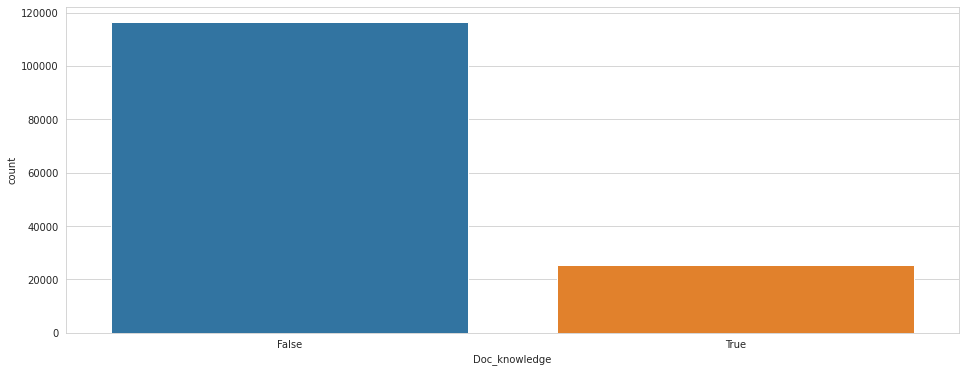

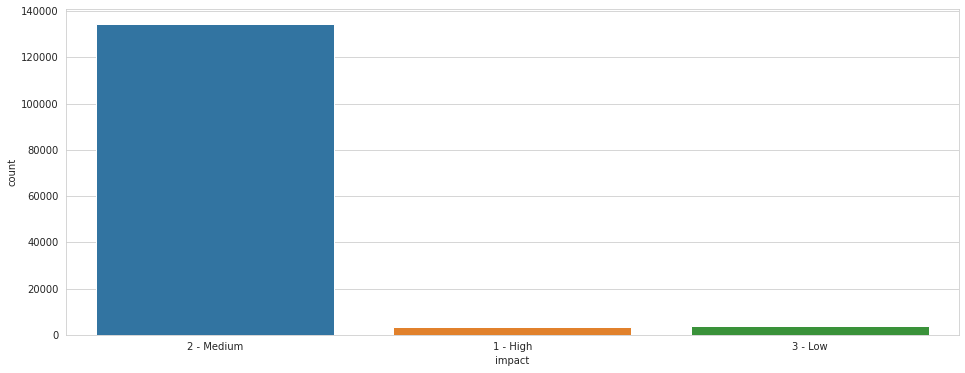

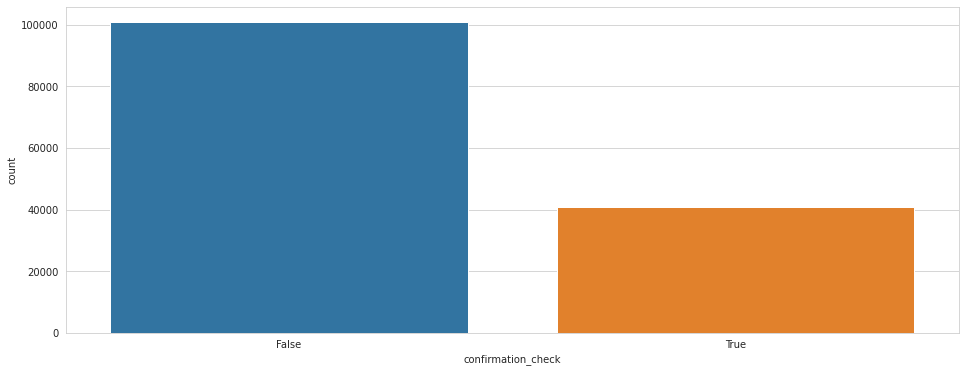

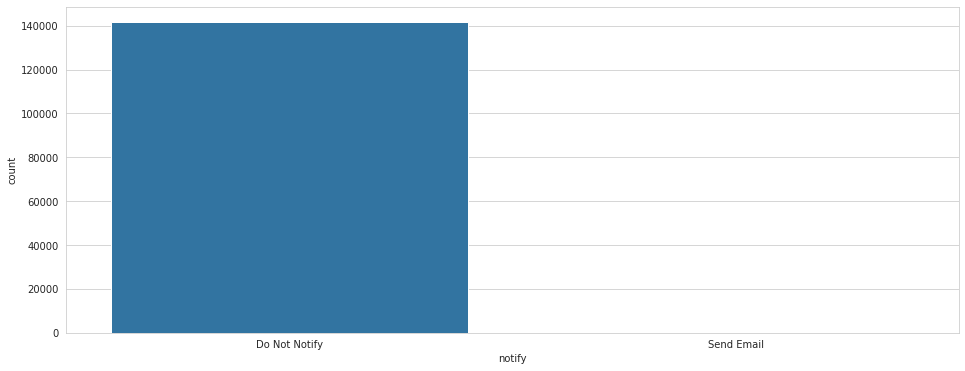

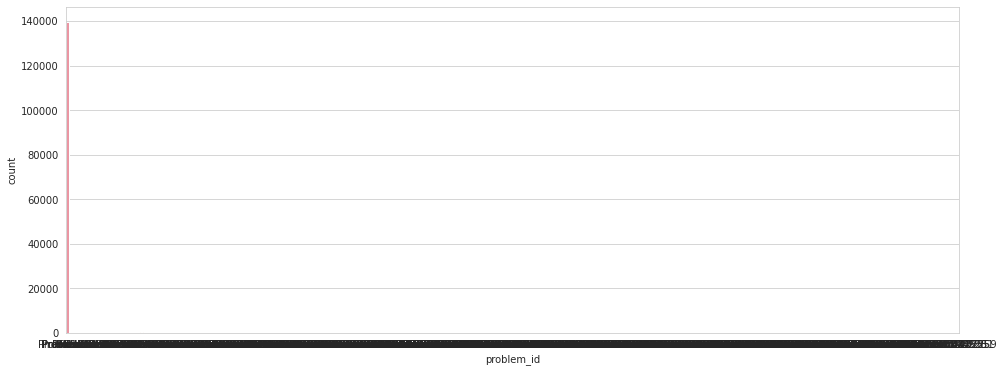

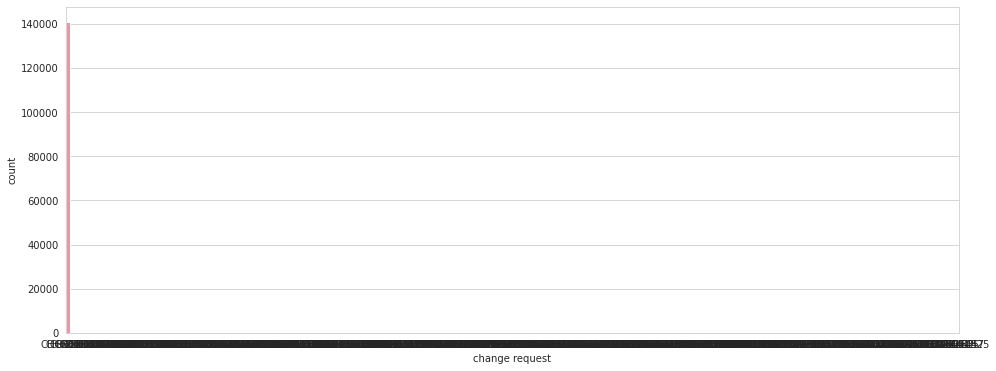

In [ ]:
sns.set_style("whitegrid")
for i, col in enumerate(categorical_features.columns):
    plt.figure(i)
    plt.figure(figsize=(16,6))
    sns.countplot(x=col, data=categorical_features)

In [ ]:
for i, col in enumerate(categorical_features.columns):
    print('\n',i,'.',col)
    print(categorical_features[col].value_counts())
    print('*'*60,'\n')


 0 . ID_status
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: ID_status, dtype: int64
************************************************************ 


 1 . active
True     116726
False     24986
Name: active, dtype: int64
************************************************************ 


 2 . count_reassign
0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18       13
22        9
19        8
21        3
27        3
26        2
23        2
24        1
25        1
Name: count_reassign, dtype: int64
************************************************************ 


 3 . count_opening
0    139398
1      1918
2    

**As We can Observe From above Visualisation and value counts data, Features 'problem_id', 'updated_by' and change request' are having very high no. of Missing values so we will exclude these features from further analysis. These features add no value to our data analysis.**